In [2]:
## IMPORT NECESSARY LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


In [3]:
import pandas as pd
df=pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
df.shape

(307645, 9)

In [5]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [6]:
df.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00
307644,2020,9,NaN,WC,WINE CREDIT,REF,0.00,0.0,-70.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [8]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,167
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,1
RETAIL SALES,3
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [9]:
print("\nSummary:\n" , df.describe(include="all"))


Summary:
                  YEAR          MONTH                           SUPPLIER  \
count   307645.000000  307645.000000                             307478   
unique            NaN            NaN                                396   
top               NaN            NaN  REPUBLIC NATIONAL DISTRIBUTING CO   
freq              NaN            NaN                              20995   
mean      2018.438525       6.423862                                NaN   
std          1.083061       3.461812                                NaN   
min       2017.000000       1.000000                                NaN   
25%       2017.000000       3.000000                                NaN   
50%       2019.000000       7.000000                                NaN   
75%       2019.000000       9.000000                                NaN   
max       2020.000000      12.000000                                NaN   

       ITEM CODE          ITEM DESCRIPTION ITEM TYPE   RETAIL SALES  \
count     307645 

In [10]:
df['TOTAL_SALES'] = df['RETAIL SALES'] + df['RETAIL TRANSFERS'] + df['WAREHOUSE SALES']
print("\n Overall Summary Statistics:")
display(df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'TOTAL_SALES']].describe())




 Overall Summary Statistics:


,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL_SALES
count,307642.000000,307645.000000,307645.000000,307642.000000
mean,7.024071,6.936465,25.294597,39.255447
std,30.986238,30.237195,249.916798,284.896964
min,-6.490000,-38.490000,-7800.000000,-7800.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.320000,0.000000,1.000000,3.000000
75%,3.267500,3.000000,5.000000,14.710000
max,2739.000000,1990.830000,18317.000000,20532.000000


In [11]:
total_retail = df['RETAIL SALES'].sum()
total_transfer = df['RETAIL TRANSFERS'].sum()
total_warehouse = df['WAREHOUSE SALES'].sum()
total_all = df['TOTAL_SALES'].sum()

print("🏪 Total Retail Sales:", round(total_retail, 2))
print("🏢 Total Retail Transfers:", round(total_transfer, 2))
print("🏬 Total Warehouse Sales:", round(total_warehouse, 2))
print("💰 Total Combined Sales:", round(total_all, 2))

🏪 Total Retail Sales: 2160899.37
🏢 Total Retail Transfers: 2133968.63
🏬 Total Warehouse Sales: 7781756.28
💰 Total Combined Sales: 12076624.28


In [12]:
## STATISTICS BY ITEM TYPE

type_stats = df.groupby('ITEM TYPE')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES','TOTAL_SALES']].agg(['sum','mean','count']).round(2)
display(type_stats)


RETAIL SALES                RETAIL TRANSFERS                 \
                      sum   mean   count              sum   mean   count   
ITEM TYPE                                                                  
BEER            574220.53  13.54   42413        566714.00  13.36   42413   
DUNNAGE              0.00   0.00      95             0.00   0.00      95   
KEGS                 0.00   0.00   10146            -1.00  -0.00   10146   
LIQUOR          802691.43  12.37   64910        794735.71  12.24   64910   
NON-ALCOHOL      34084.31  17.89    1905         26666.38  13.98    1908   
REF                663.63   5.23     127           388.92   3.06     127   
STR_SUPPLIES      2740.88   6.77     405         10846.58  26.78     405   
WINE            746498.59   3.98  187640        734618.04   3.92  187640   

             WAREHOUSE SALES                  TOTAL_SALES                   
                         sum     mean   count         sum     mean   count  
ITEM TYPE                                                                   
BEER              6527236.51   153.90   42413  7668171.04   180.80   42413  
DUNNAGE           -121454.00 -1278.46      95  -121454.00 -1278.46      95  
KEGS               118431.00    11.67   10146   118430.00    11.67   10146  
LIQUOR              94906.27     1.46   64910  1692333.41    26.07   64910  
NON-ALCOHOL         26149.59    13.71    1908    86900.28    45.62    1905  
REF                -20499.00  -161.41     127   -19446.45  -153.12     127  
STR_SUPPLIES            0.00     0.00     405    13587.46    33.55     405  
WINE              1156984.91     6.17  187640  2638101.54    14.06  187640

/tmp/ipython-input-2948532438.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['ITEM TYPE'], y=df['TOTAL_SALES'], estimator='sum', ci=None)


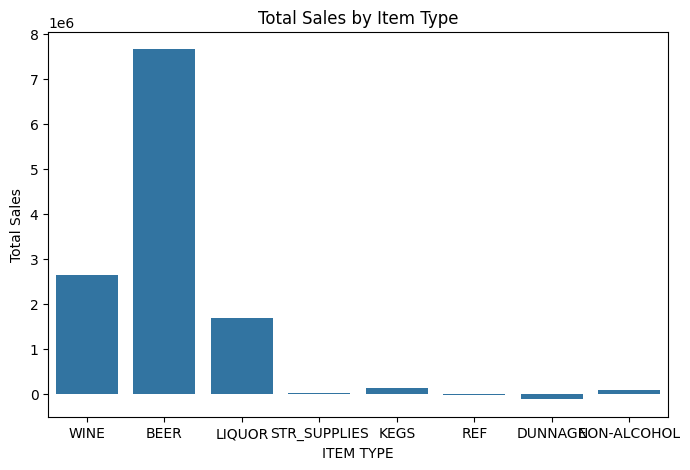

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['ITEM TYPE'], y=df['TOTAL_SALES'], estimator='sum', ci=None)
plt.title("Total Sales by Item Type")
plt.ylabel("Total Sales")
plt.show()


,TOTAL_SALES
SUPPLIER,
CROWN IMPORTS,1819141.93
MILLER BREWING COMPANY,1597808.94
ANHEUSER BUSCH INC,1549362.68
HEINEKEN USA,940796.79
E & J GALLO WINERY,528656.13
DIAGEO NORTH AMERICA INC,459921.54
CONSTELLATION BRANDS,380826.10
BOSTON BEER CORPORATION,271825.23
THE WINE GROUP,200316.64


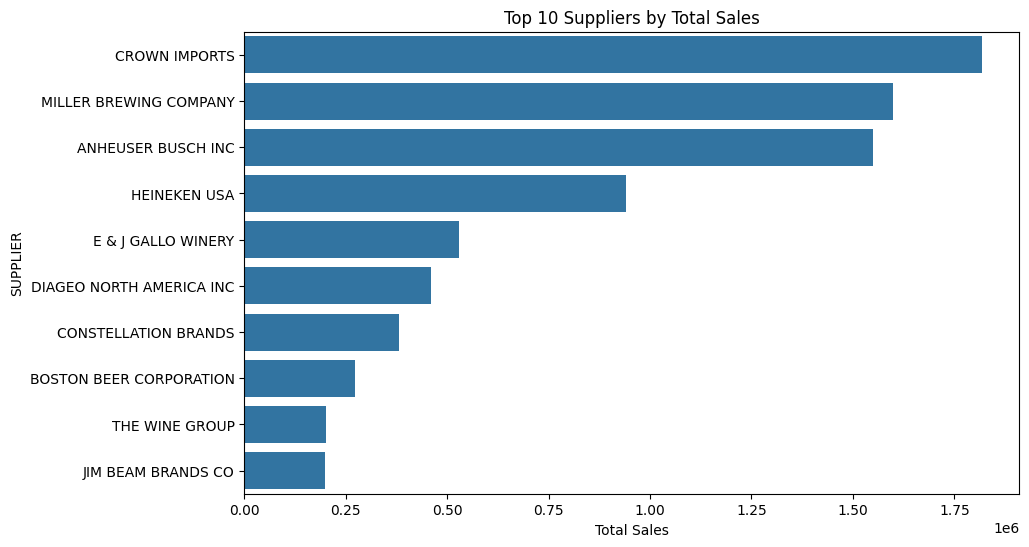

In [14]:
## TOP SUPPLIERS BY TOTAL SALES

supplier_stats = df.groupby('SUPPLIER')['TOTAL_SALES'].sum().sort_values(ascending=False).head(10)
display(supplier_stats)

plt.figure(figsize=(10,6))
sns.barplot(y=supplier_stats.index, x=supplier_stats.values)
plt.title("Top 10 Suppliers by Total Sales")
plt.xlabel("Total Sales")
plt.show()

In [15]:
## MONTHLY SUMMARY

monthly_stats = df.groupby(['YEAR', 'MONTH'])['TOTAL_SALES'].agg(['sum','mean','count']).reset_index()
display(monthly_stats)


,YEAR,MONTH,sum,mean,count
0,2017,6,571468.09,41.933379,13628
1,2017,7,498561.83,38.286118,13022
2,2017,8,558784.90,41.117358,13590
3,2017,9,481827.51,35.994883,13386
4,2017,10,485987.84,35.666215,13626
5,2017,11,540852.81,37.218057,14532
6,2017,12,559721.22,38.601463,14500
7,2018,1,404705.58,30.326383,13345
8,2018,2,422069.43,32.219040,13100
9,2019,1,432777.40,34.923935,12392


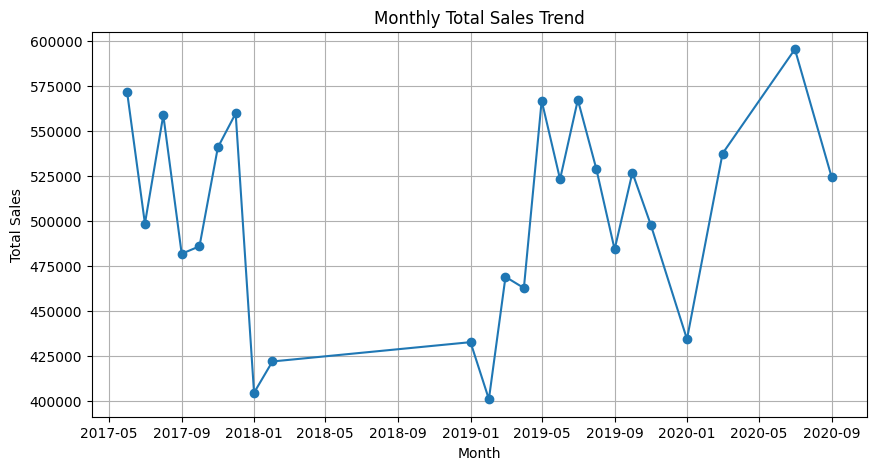

In [16]:
## MONTHLY TREND PLOT

df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01')
monthly_trend = df.groupby('DATE')['TOTAL_SALES'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o')
plt.title("Monthly Total Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

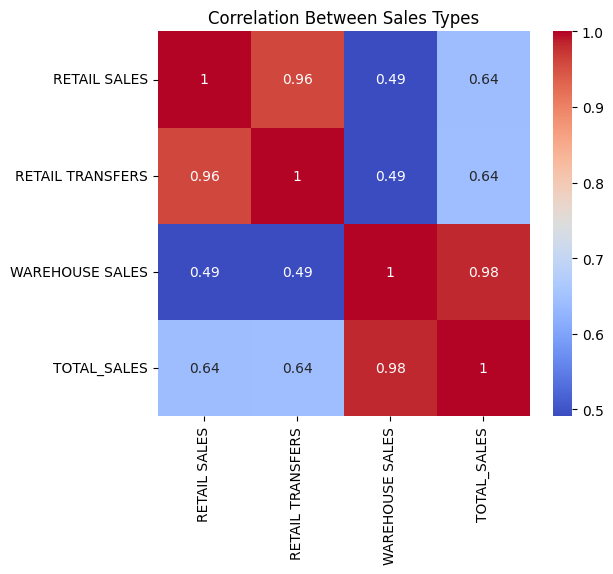

In [17]:
## CORRELATION ANALYSIS

plt.figure(figsize=(6,5))
sns.heatmap(df[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES','TOTAL_SALES']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales Types")
plt.show()

In [18]:
## KEY INSIGHTS AND SUMMARY

print("\n💡 Insights Summary:")
print("- Total Combined Sales:", round(total_all, 2))
print("- Highest Selling Item Type:", df.groupby('ITEM TYPE')['TOTAL_SALES'].sum().idxmax())
print("- Top Supplier:", df.groupby('SUPPLIER')['TOTAL_SALES'].sum().idxmax())
print("- Month with Highest Sales:", monthly_stats.loc[monthly_stats['sum'].idxmax(), ['YEAR','MONTH']].to_dict())
print("- Correlation shows which sales channels move together (retail vs warehouse).")


💡 Insights Summary:
- Total Combined Sales: 12076624.28
- Highest Selling Item Type: BEER
- Top Supplier: CROWN IMPORTS
- Month with Highest Sales: {'YEAR': 2020.0, 'MONTH': 7.0}
- Correlation shows which sales channels move together (retail vs warehouse).
